# Analisi NOAA

## Introduzione

In questa analisi, esaminerò i dati sui fulmini raccolti dalla National Oceanic and Atmospheric Association (NOAA) per l'anno 2018. 

Step:

* Individuare le località con il maggior numero di fulmini in un singolo giorno
* Esaminare le località che hanno avuto il maggior numero di giorni con almeno un fulmine
* Determinare se alcuni giorni della settimana hanno avuto più fulmini di altri
* Integrare i dati dei fulmini del 2016 e 2017. Successivamente, per ogni anno, calcolare quale percentuale sul totale annuale di fulmini si è verificata in ciascun mese.
* Rappresentare questi dati su un grafico a barre

## Importare pacchetti e librerie

In [1]:
# Importare pacchetti e librerie
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

### Organize the data

In [ ]:
# caricamento dei dati e salvataggio in una variabile
df = pd.read_csv('noaa_dataset_2018.csv') 
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


Proprio come i dati che ho usato in precedenza, questo set di dati ha tre colonne: `date`, `number_of_strikes` e `center_point_geom`. 

Inizio convertendo la colonna `date` in datetime.

In [3]:
# Conversione della colonna date in datetime
df['date'] = pd.to_datetime(df['date']) 

Verifico la dimensione del dataframe.

In [4]:
df.shape

(3401012, 3)

Il dataframe ha **3401012** righe e **3** colonne.

Verifico la presenza di duplicati. Se la forma dei dati è diversa dopo aver eseguito questo codice, saprò che erano presenti righe duplicate.

In [5]:
df.drop_duplicates().shape

(3401012, 3)

La forma del set di dati dopo l'eliminazione dei duplicati è la stessa, quindi si può presumere che non ci siano duplicati.

### Località con più fulmini in un solo giorno

Per identificare le località con il maggior numero di fulmini in un singolo giorno, ordinerò la colonna `number_of_strikes` in ordine decrescente, ovvero dal numero di scioperi più alto a quello più basso.

In [6]:
# Ordino i dati per numero di fulmini più alto
df.sort_values(by='number_of_strikes', ascending=False).head(10)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


### Località con la maggior parte dei giorni con almeno un fulmine

Per calcolare il numero di giorni in cui una determinata posizione geografica è stata colpita da almeno un fulmine, utilizzerò la funzione `value_counts()` sulla colonna `center_point_geom`. La logica è che se ogni riga rappresenta un giorno-posizione, contando il numero di volte in cui ogni posizione compare nei dati si otterrà il numero di giorni in cui quella posizione è stata colpita da un fulmine.

In [7]:
# Identifico le località con più giorni con almeno un fulmine
df.center_point_geom.value_counts()

POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.5 22.9)     107
POINT(-82.7 22.9)     107
POINT(-82.5 22.8)     106
                     ... 
POINT(-119.3 35.1)      1
POINT(-119.3 35)        1
POINT(-119.6 35.6)      1
POINT(-119.4 35.6)      1
POINT(-58.5 45.3)       1
Name: center_point_geom, Length: 170855, dtype: int64

Le località con il maggior numero di giorni con fulmini hanno avuto almeno un fulmine in 108 giorni, ovvero quasi uno su tre all'anno. Queste località sono tutte piuttosto vicine tra loro geograficamente.

Ora esaminerò se la distribuzione dei valori è uniforme o se 108 fulmini è un numero insolitamente elevato di giorni con fulmini. Utilizzerò nuovamente la funzione `value_counts()`, ma questa volta mostrerò i primi 20 risultati. 

In [8]:
# Identifico le 20 località con più giorni con almeno un fulmine
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts')

,unique_values,counts
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.5 22.9),107
3,POINT(-82.7 22.9),107
4,POINT(-82.5 22.8),106
5,POINT(-84.2 22.3),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


### Fulmini per giorno della settimana

Effettuerò il raggruppamento del numero di fulmini per giorno della settimana, per capire  se un particolare giorno della settimana ha avuto meno o più fulmini rispetto ad altri. 

Per calcolare questo, sfrutterò il fatto che i dati nella colonna `date` appartengono alla classe `datetime` per estrarre informazioni relative ai giorni e alle settimane e salvarle in nuove colonne.

In [9]:
# Creo una colonna per le settimane una per i giorni della settimana
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df.head()

,date,number_of_strikes,center_point_geom,week,weekday
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday


Now, we can calculate the mean number of lightning strikes for each weekday of the year. We will use the `groupby()` function to do this.

In [10]:
# Calcolo la media del numero di fulmini per ogni giorno della settimana
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,13.349972
Monday,13.152804
Saturday,12.732694
Sunday,12.324717
Thursday,13.240594
Tuesday,13.813599
Wednesday,13.224568


Sembra che Sabato e Domenica siano mediamente meno colpiti da fulmini rispetto agli altri cinque giorni feriali. 

Traccerò la distribuzione dei conteggi dei fulmini per ogni giorno della settimana attraverso un boxplot.

Inizierò definendo l'ordine dei giorni, iniziando da lunedì e terminando con domenica per il grafico.

In [11]:
# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

Ora, procedo con la creazione del grafico inserendo il paramentro `showfliers=False` che escluderà valori anomali dalla visualizzazione.

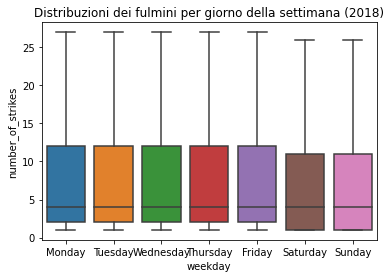

In [23]:
# Create boxplots of strike counts for each day of week.
g = sns.boxplot(data=df, 
            x='weekday',
            y='number_of_strikes', 
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('Distribuzioni dei fulmini per giorno della settimana (2018)');

- La mediana rimane la stessa in tutti i giorni della settimana
- Nei giorni sabato e domenica le distribuzioni sono *entrambe* inferiori rispetto al resto della settimana. Perché? Ci sono numerosi studi che esplorano questa relazione. La scienza del clima ha ampiamente dimostrato che le particelle di inquinamento (aerosol) possono influenzare la formazione delle nuvole e le precipitazioni.

### Fulmini mensili 2016-2018

Infine, esaminerò i dati mensili sui fulmini dal 2016 al 2018.

- Calcolerò la percentuale di fulmini totali per ogni anno verificatisi in un dato mese.
- Successivamente, rappresenterò questi dati su un grafico a barre.

In [ ]:
# Importo i dati del 2016–2017 
df_2 = pd.read_csv('noaa_dataset_2016_2017.csv')
df_2.head()

,date,number_of_strikes,center_point_geom
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)


I dati sono nello stesso formato dei dati del 2018. Ora, convertirò la colonna `date` in datetime.

In [14]:
# Converto la colonna date in datetime
df_2['date'] = pd.to_datetime(df_2['date'])

Ora posso unire il dataframe 2016-2017 con quello 2018 con la funzione `concat()`. I dati del 2018 hanno due colonne aggiunte: `week` e `weekday`. Per semplificare i risultati del dataframe combinato, eliminerò queste colonne aggiunte durante la concatenazione.

In [15]:
# Creazione di un nuovo data frame dall'unione dei datasets
union_df = pd.concat([df.drop(['weekday','week'],axis=1), df_2], ignore_index=True)
union_df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


Per aiutarmi a denominare le barre del grafico a barre, creerò tre nuove colonne che isolano l'anno, il numero del mese e il nome del mese.

In [16]:
# Aggiungo tre nuove colonne
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-01-03,194,POINT(-75 27),2018,1,January
1,2018-01-03,41,POINT(-78.4 29),2018,1,January
2,2018-01-03,33,POINT(-73.9 27),2018,1,January
3,2018-01-03,38,POINT(-73.8 27),2018,1,January
4,2018-01-03,92,POINT(-79 28),2018,1,January


Controllo il conteggio complessivo dei fulmini per ogni anno.

In [17]:
# Calcolo il numero di fulmini per anno
union_df[['year','number_of_strikes']].groupby(['year']).sum()

,number_of_strikes
year,
2016,41582229
2017,35095195
2018,44600989


Ora calcolerò la percentuale totale di fulmini che si sono verificati in un dato mese per ogni anno e assegnerò i risultati a un nuovo dataframe denominato `lightning_by_month`.

In [18]:
# Calcolo il totale dei fulmini per ogni mese di ogni anno
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()

lightning_by_month.head()

,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,1524339
3,August,2016,7250442
4,August,2017,6021702


Userò la funzione `agg()` per ripetere lo stesso calcolo fatto in precedenza, dove si è scoperto che il 2017 ha avuto meno fulmini rispetto agli altri due anni.

In [19]:
# Calculate total lightning strikes for each year.
lightning_by_year = union_df.groupby(['year']).agg(
  year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()

lightning_by_year.head()

,year,year_strikes
0,2016,41582229
1,2017,35095195
2,2018,44600989


Nel grafico a barre, devo utilizzare i totali mensili per calcolare le percentuali.

Procedo con:
- Creare un altro dataframe chiamato `percentage_lightning` che aggiunge una nuova colonna chiamata `year_strikes` che rappresenta il numero totale di scioperi per ogni anno. 

In [20]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2636427,41582229
1,August,2016,7250442,41582229
2,December,2016,316450,41582229
3,February,2016,312676,41582229
4,January,2016,313595,41582229


Ora creerò una nuova colonna nel nuovo dataframe che rappresenti la percentuale totale di fulmini verificatisi durante ogni mese di ogni anno. Per farlo, dividerò la colonna `number_of_strikes` per la colonna `year_strikes` e moltiplicheremo il risultato per 100.

In [21]:
# Creazione della colonna delle percentuali di fulmini per mese
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.340273
1,August,2016,7250442,41582229,17.436396
2,December,2016,316450,41582229,0.761022
3,February,2016,312676,41582229,0.751946
4,January,2016,313595,41582229,0.754156


Ora posso rappresentare le percentuali per mese in un grafico a barre.

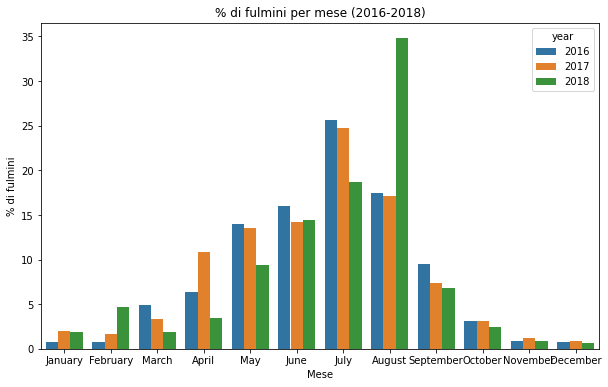

In [25]:
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_lightning,
    x = 'month_txt',
    y = 'percentage_lightning_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Mese");
plt.ylabel("% di fulmini");
plt.title("% di fulmini per mese (2016-2018)");

## Conclusioni

Dall'analisi dei dati si può osservare una tendenza ben definita e coerente per tutti e tre gli anni presi in esame. C'è un picco evidente e un mese che spicca in modo significativo: **agosto**.

In particolare, per l'anno 2018, il mese di agosto ha registrato un'incidenza straordinaria, rappresentando da solo più di un terzo del totale dei fulmini di quell'anno. Questo dato suggerisce che le condizioni atmosferiche di agosto sono particolarmente favorevoli alla formazione di temporali e fulmini in queste aree.